In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('pattern_data.csv',delimiter=';',encoding='utf-8')
df=df.drop_duplicates(subset='pattern_id')


df_yarn=pd.read_csv('yarn_data.csv',delimiter=';',low_memory=False,encoding='utf-8')

df['Match'] = np.where(df['yarn_id'].isin(df_yarn['yarn_id']),'Found', 'Not Found')
df = df[df['Match'] == 'Found']

In [2]:
df = df.reset_index(drop=True)
df

,comments_count,pattern_creation_date,difficulty_average,downloadable,favorites_count,free,pattern_id,pattern_name,pattern_permalink,projects_count,...,language,packs_id,yarn_id,yarn_permalink,yarn_name,yarn_company_name,yarn_company_id,needle_id,needle_metric,Match
0,4,2024-06-28 16:46:29,2.250000,True,1807,True,7350461,Taylor Swift Granny Dress,taylor-swift-granny-dress,44,...,English,123728647,4213,mary-maxim-starlette-worsted-weight,Starlette Worsted Weight,Mary Maxim,342,11,6.50,Found
1,0,2024-08-02 09:50:00,4.500000,True,458,False,7358520,Nuanua,nuanua,68,...,English,124411740,134833,expression-fiber-arts-luster-superwash-merino-...,Luster Superwash Merino Sport,Expression Fiber Arts,10426,8,5.00,Found
2,0,2024-10-23 16:19:46,2.200000,True,999,True,7379520,Abrielle Crochet Mug Cozy,abrielle-crochet-mug-cozy,30,...,English,126279096,2085,lion-brand-wool-ease-solids-heathers-twists,"Wool Ease Solids, Heathers, Twists",Lion Brand,99,8,5.00,Found
3,8,2024-11-17 01:02:22,1.800000,True,604,True,7385763,Harvest Neck Scarf,harvest-neck-scarf,21,...,English,126850475,132809,knit-picks-mighty-stitch,Mighty Stitch,Knit Picks,96,7,4.50,Found
4,0,2024-12-22 19:19:33,5.500000,True,262,False,7394869,An·tic·i·pa·tion,anticipation-8,25,...,English,127687602,170642,cotton-kings-cotton-8-4,Cotton 8/4,Cotton Kings,20229,3,3.25,Found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53790,12,2014-01-28 11:12:00,2.192308,True,765,True,466170,'High Hopes' Sock,high-hopes-sock,95,...,English,35717949,68428,easyknitscouk-twinkle,Twinkle,Easyknits.co.uk,3324,2,2.75,Found
53791,7,2014-01-28 12:13:00,2.575758,True,1182,True,466198,Sea Scales Cowl,sea-scales-cowl,100,...,English,35719513,7308,fyberspates-scrumptious-dk,Scrumptious DK,Fyberspates,266,6,4.00,Found
53792,0,2014-01-29 07:30:00,3.000000,True,645,True,466373,153-34 Amanda,153-34-amanda,24,...,Czech,35741349,2706,garnstudio-drops-paris,DROPS Paris,Garnstudio,10430,10,6.00,Found
53793,15,2014-01-29 13:33:00,4.666667,True,1322,False,466447,Love and Kisses Cowl,love-and-kisses-cowl,31,...,English,35748549,48579,berroco-vintage,VintageÂ®,Berroco,4,5,3.75,Found


In [3]:
df['craft_name'].value_counts()

craft_name
Crochet             28992
Knitting            24802
Machine Knitting        1
Name: count, dtype: int64

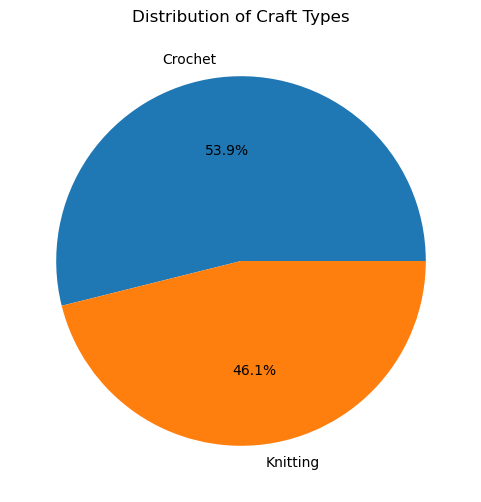

In [ ]:
df=df[df['craft_name']!='Machine Knitting']

counts = df['craft_name'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Craft Types')
plt.show()

In [15]:
df_yarn['yarn_weight_name'].value_counts()

yarn_weight_name
Fingering          22325
DK                  5822
Lace                5356
Sport               4989
Light Fingering     3878
Aran                2646
Worsted             2387
Bulky               1437
Thread               969
Super Bulky          891
Cobweb               495
Jumbo                126
DK / Sport             2
Name: count, dtype: int64

In [18]:
df_yarn.loc[df_yarn['yarn_weight_name'] == 'DK / Sport', 'yarn_weight_name'] = 'Sport'

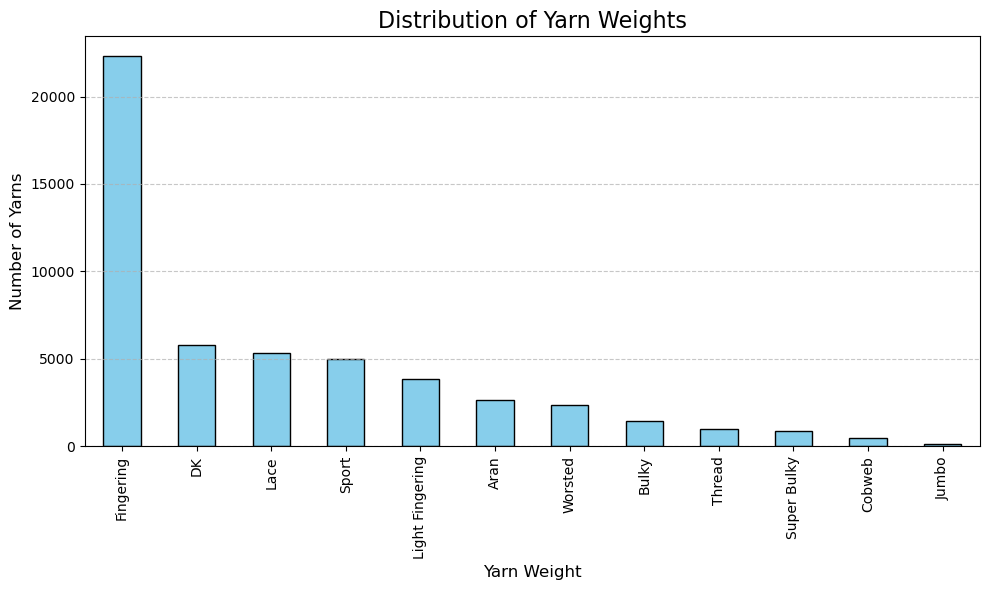

In [ ]:
yarn_counts=df_yarn['yarn_weight_name'].value_counts()

plt.figure(figsize=(10, 6))
yarn_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Yarn Weights', fontsize=16)
plt.xlabel('Yarn Weight', fontsize=12)
plt.ylabel('Number of Yarns', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [73]:
#knowledge based filter
#filters:
# -category
# -free?
#it will show 5 results based on the quaries
def pattern_filter(patterns):
    #Craft
    craft = input("Which craft?")
    print(craft)

    #Category filter
    category = input("Available categories: \n"+ ", ".join(patterns["pattern_category2"].unique().tolist()))
    print(category)

    #Paid version
    free_input = input("Free pattern?")
    if free_input in ['yes', 'true']:
        free = True
    else:
        free = False

    patterns=patterns.loc[(patterns["craft_name"]==craft)&(patterns["pattern_category2"]==category)&(patterns["free"]==free)]
# a scoring system can be developed here based on favourites count, projects count ...
    patterns=patterns.sort_values(by="favorites_count",ascending=False)

    return patterns.head(3)



In [74]:
knowledge_based=pattern_filter(df)
knowledge_based

Crochet
cozy


,comments_count,pattern_creation_date,difficulty_average,downloadable,favorites_count,free,pattern_id,pattern_name,pattern_permalink,projects_count,...,language,packs_id,yarn_id,yarn_permalink,yarn_name,yarn_company_name,yarn_company_id,needle_id,needle_metric,Match
24435,9,2011-01-13 13:17:44,2.692308,True,1565,False,222319,Skirt Guards,skirt-guards,37,...,Dutch,15067843,2708,garnstudio-drops-safran,DROPS Safran,Garnstudio,10430,21,2.5,Found
9933,6,2018-07-26 17:08:55,3.818182,True,1008,False,850053,FranNamaste Yoga Mat Bag,frannamaste-yoga-mat-bag,37,...,English,74732542,136563,lion-brand-24-7-cotton,24/7 Cotton,Lion Brand,99,4,3.5,Found
11004,5,2020-04-01 03:32:15,2.222222,True,975,False,1018829,Moss-Stitch Soup Bowl Cozy,moss-stitch-soup-bowl-cozy,53,...,English,89137618,819,lily-spinrite-sugarn-cream-ombres,Sugar'n Cream Ombres,Lily (Spinrite),58,8,5.0,Found


In [75]:
print('Here are the links for the 3 suggested patterns: ')
for i in knowledge_based["pattern_permalink"]:
    print("https://www.ravelry.com/patterns/library/"+i)

Here are the links for the 3 suggested patterns: 
https://www.ravelry.com/patterns/library/skirt-guards
https://www.ravelry.com/patterns/library/frannamaste-yoga-mat-bag
https://www.ravelry.com/patterns/library/moss-stitch-soup-bowl-cozy


In [76]:
print('Choose one of the 3 to have new patterns recommended')
choice=int(input('Write the number for the chosen pattern'))-1
chosen_pattern=knowledge_based.iloc[choice]
pa_id=chosen_pattern['pattern_id']

Choose one of the 3 to have new patterns recommended


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53795 entries, 0 to 53794
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   comments_count                  53795 non-null  int64  
 1   pattern_creation_date           53795 non-null  object 
 2   difficulty_average              53795 non-null  float64
 3   downloadable                    53795 non-null  bool   
 4   favorites_count                 53795 non-null  int64  
 5   free                            53795 non-null  bool   
 6   pattern_id                      53795 non-null  int64  
 7   pattern_name                    53795 non-null  object 
 8   pattern_permalink               53795 non-null  object 
 9   projects_count                  53795 non-null  int64  
 10  queued_projects_count           53795 non-null  int64  
 11  rating_average                  53795 non-null  float64
 12  ravelry_download                

In [78]:
df["combine_features"]=(df['pattern_category1']+' '+df['pattern_category2']+' '
                         +df['pattern_attributes']+' '+df['yarn_weight_name']+' '
                         +df['craft_name']+' '+df['pattern_author_permalink']+' '
                         +df['pattern_source_type_name']+' '+df['pattern_type_permalink']+' '+df['yarn_permalink'])

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
pattern_matrix=tfidf.fit_transform(df['combine_features'])
pattern_matrix.shape

(53795, 17215)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler


def get_recommendation_pattern(id,df,pattern_matrix):
    idx=df.index[df['pattern_id']==id]
    idx = idx[0]

    craft = df.loc[idx, 'craft_name']
    category = df.loc[idx, 'pattern_category2']
    df_filtered=df.loc[(df['craft_name']==craft)&(df['pattern_category2']==category)].copy()

    pattern_matrix=tfidf.transform(df_filtered['combine_features'])

    idx_filtered = df_filtered.index[df_filtered['pattern_id'] == id][0]
    local_idx = df_filtered.index.get_loc(idx_filtered)

    cosine_sim = cosine_similarity(pattern_matrix[local_idx], pattern_matrix).flatten()
   
    scaler = MinMaxScaler()
    df_filtered[['difficulty_scaled', 'favorites_scaled','ratings_scaled']] = scaler.fit_transform(
    df_filtered[['difficulty_average', 'favorites_count','rating_average']])
    hybrid_score = (cosine_sim * 0.8 + df_filtered['favorites_scaled'] *0.05+ 
                    df_filtered['difficulty_scaled']*0.2+df_filtered['ratings_scaled']*0.3 )
    
    sim_scores = list(enumerate(hybrid_score))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in sim_scores[1:9]]
    
    return df_filtered.iloc[top_indices]

In [81]:
content_based=get_recommendation_pattern(pa_id,df,pattern_matrix)
print("Here are some recommendations based on your chosen pattern: ")
for i in content_based["pattern_permalink"]:
    print("https://www.ravelry.com/patterns/library/"+i)

Here are some recommendations based on your chosen pattern: 
https://www.ravelry.com/patterns/library/crochet-chair-caddy
https://www.ravelry.com/patterns/library/microwavable-bowl-cozy
https://www.ravelry.com/patterns/library/soap-sacks
https://www.ravelry.com/patterns/library/crochet-can-cozy-2
https://www.ravelry.com/patterns/library/starbean-bottle-carrier
https://www.ravelry.com/patterns/library/beverage-can-holder
https://www.ravelry.com/patterns/library/crochet-roller-skate-leash
https://www.ravelry.com/patterns/library/microwave-bobble-bowl-cozies-3


In [82]:
print('Lets generate some alternatives for the yarn')

answer=int(input('Which pattern do you want the yarn alternative for? The one chosen originally(1) or new one(2)? Write the number!'))
if answer==1:
    chosen_yarn=chosen_pattern["yarn_id"]
else:    
    print('Choose one of the recommended patterns.')
    choice=int(input('Write the number for the chosen pattern'))-1
    chosen_pattern=content_based.iloc[choice]
    chosen_yarn=chosen_pattern['yarn_id']

    

Lets generate some alternatives for the yarn
Choose one of the recommended patterns.


In [83]:
chosen_yarn.tostring()

C:\Users\robot\AppData\Local\Temp\ipykernel_8772\2358639646.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  chosen_yarn.tostring()


b'2\x03\x00\x00\x00\x00\x00\x00'

In [84]:
df_yarn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51323 entries, 0 to 51322
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   discontinued              51323 non-null  bool   
 1   grams                     51323 non-null  float64
 2   yarn_id                   51323 non-null  int64  
 3   name                      51323 non-null  object 
 4   permalink                 51323 non-null  object 
 5   yarn_fibers               51323 non-null  object 
 6   yarn_attributes           51323 non-null  object 
 7   yarn_company_id           51323 non-null  float64
 8   yarn_company_name         51323 non-null  object 
 9   yarn_company_permalink    51323 non-null  object 
 10  yarn_company_yarns_count  51323 non-null  float64
 11  yarn_weight_id            51323 non-null  float64
 12  yarn_weight_name          51323 non-null  object 
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 4.7

In [85]:
df_yarn['combine_features']=(str(df_yarn['grams'])+' '+df_yarn['yarn_fibers']+' '
                             +df_yarn['yarn_attributes']+' '+df_yarn['yarn_company_permalink']+' '
                             +df_yarn['yarn_weight_name'])                                                                                                                                                               

In [86]:
yarn_matrix=tfidf.fit_transform(df_yarn['combine_features'])
yarn_matrix.shape

(51323, 8182)

In [89]:
def get_recommendation_yarn(id,df,yarn_matrix):
    
    #yarn_matrix=tfidf.transform(df['combine_features'])
    df=df.loc[df['discontinued']==False]
    yarn_matrix=tfidf.transform(df['combine_features'])
    idx=df.index[df['yarn_id']==id][0]
    cosine_sim = cosine_similarity(yarn_matrix[idx], yarn_matrix).flatten()

    
    sim_scores = list(enumerate(cosine_sim))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in sim_scores[1:9]]
    
    return df.iloc[top_indices]

In [90]:
yarn_recommend=get_recommendation_yarn(chosen_yarn,df_yarn,yarn_matrix)
print("Here are some recommendations based on your chosen pattern: ")
for i in yarn_recommend["permalink"]:
    print("https://www.ravelry.com/yarns/library/"+i)

Here are some recommendations based on your chosen pattern: 
https://www.ravelry.com/yarns/library/filatura-di-crosa-zara-chine
https://www.ravelry.com/yarns/library/filatura-di-crosa-zara-family-laceweight-centolavaggi
https://www.ravelry.com/yarns/library/filatura-di-crosa-golden-line-nirvana
https://www.ravelry.com/yarns/library/filatura-di-crosa-zarina-chine
https://www.ravelry.com/yarns/library/filatura-di-crosa-zarina
https://www.ravelry.com/yarns/library/filatura-di-crosa-baby-zarina-print
https://www.ravelry.com/yarns/library/filatura-di-crosa-zara-8
https://www.ravelry.com/yarns/library/filatura-di-crosa-zara-plus


In [91]:
what=df.loc[df['pattern_category2']=='categories']
for i in what["pattern_permalink"]:
    print("https://www.ravelry.com/patterns/library/"+i)

https://www.ravelry.com/patterns/library/knockers-crochet
https://www.ravelry.com/patterns/library/chemo-port-seat-belt-pillow
https://www.ravelry.com/patterns/library/knitted-knockers-crochet
https://www.ravelry.com/patterns/library/walker-organizer-2
https://www.ravelry.com/patterns/library/the-ava-cowl
https://www.ravelry.com/patterns/library/retention-bandage-crocheted
https://www.ravelry.com/patterns/library/little-love-cannula-sleeve
https://www.ravelry.com/patterns/library/strawberry-menstrual-cup-pouch
https://www.ravelry.com/patterns/library/breast-cancer-survivors-false-breast
https://www.ravelry.com/patterns/library/helping-hand-walker-bag
https://www.ravelry.com/patterns/library/knitted-knockers-2-needles
https://www.ravelry.com/patterns/library/knitted-knockers-dpns-in-round
https://www.ravelry.com/patterns/library/knitted-knockers-on-dpns
https://www.ravelry.com/patterns/library/tit-bits


In [92]:
what['pattern_category1']

2163         medical
4672         medical
6492         medical
8050         medical
10196    accessories
16338        medical
16574        medical
21195        medical
22344        medical
23383        medical
31377        medical
38892        medical
46065        medical
52676        medical
Name: pattern_category1, dtype: object